In [1]:
import sys
sys.path.append('../package')
import lostark as lok
import pandas as pd
import numpy as np
import pprint
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = "C:/Users/user/Code_Files_Jupyter/nanum-all/나눔 글꼴/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_columns', None)

In [2]:
# 테이블 불러오기
df = lok.get_table_df('card_table')

In [3]:
df.head(2)

,characterCode,card1_name,card1_level,card2_name,card2_level,card3_name,card3_level,card4_name,card4_level,card5_name,card5_level,card6_name,card6_level,setName1,setPoint1,setName2,setPoint2,setName3,setPoint3,setName4,setPoint4,setName5,setPoint5
0,1,웨이,5,실리안,5,바훈투르,5.0,니나브,5.0,아제나&이난나,5.0,샨디,5.0,세상을 구하는 빛 6세트,30.0,None,NaN,None,NaN,None,NaN,None,None
1,3,아드린느,0,브리아레오스,0,수신 아포라스,0.0,타르실라,0.0,솔 그랑데,0.0,마네스,0.0,필드 보스 II 6세트,0.0,None,NaN,None,NaN,None,NaN,None,None


In [4]:
for i in range(0, len(df.columns), 20):
    df.iloc[:, i:i+20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444152 entries, 0 to 444151
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   characterCode  444152 non-null  int64  
 1   card1_name     444152 non-null  object 
 2   card1_level    444152 non-null  int64  
 3   card2_name     444152 non-null  object 
 4   card2_level    444152 non-null  int64  
 5   card3_name     443980 non-null  object 
 6   card3_level    443980 non-null  float64
 7   card4_name     443615 non-null  object 
 8   card4_level    443615 non-null  float64
 9   card5_name     437063 non-null  object 
 10  card5_level    437063 non-null  float64
 11  card6_name     435215 non-null  object 
 12  card6_level    435215 non-null  float64
 13  setName1       444140 non-null  object 
 14  setPoint1      444140 non-null  float64
 15  setName2       40858 non-null   object 
 16  setPoint2      40858 non-null   float64
 17  setName3       675 non-null  

착용 기준임, 실 활성화는 파악할 수 없음


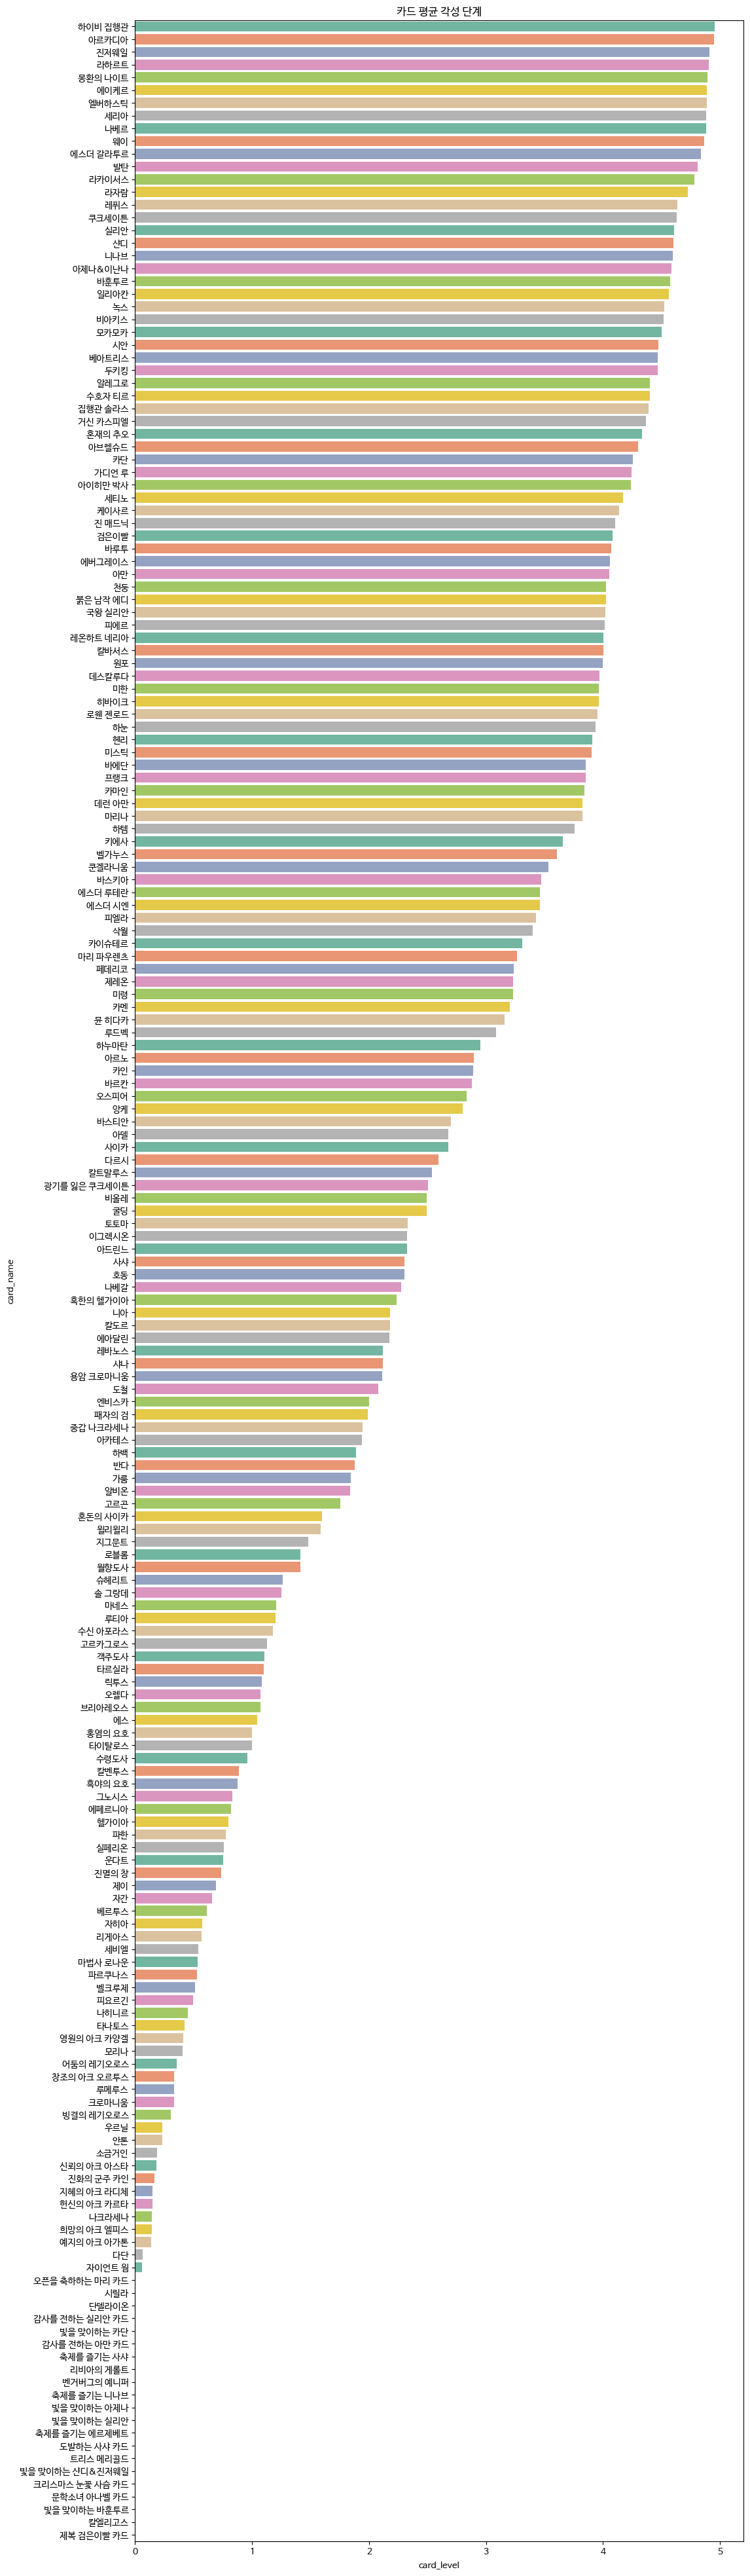

In [32]:
res = pd.DataFrame()
res['card_name'] = pd.concat([df[f'card{i}_name'] for i in range(1, 7)])
res['card_level'] = pd.concat([df[f'card{i}_level'] for i in range(1, 7)])

data = res.groupby('card_name').mean().sort_values(by='card_level', ascending=False)

plt.figure(figsize=(12, 50))
sns.barplot(x=data['card_level'], y=data.index, palette='Set2', orient='h')
plt.title('카드 평균 각성 단계')
plt.show()

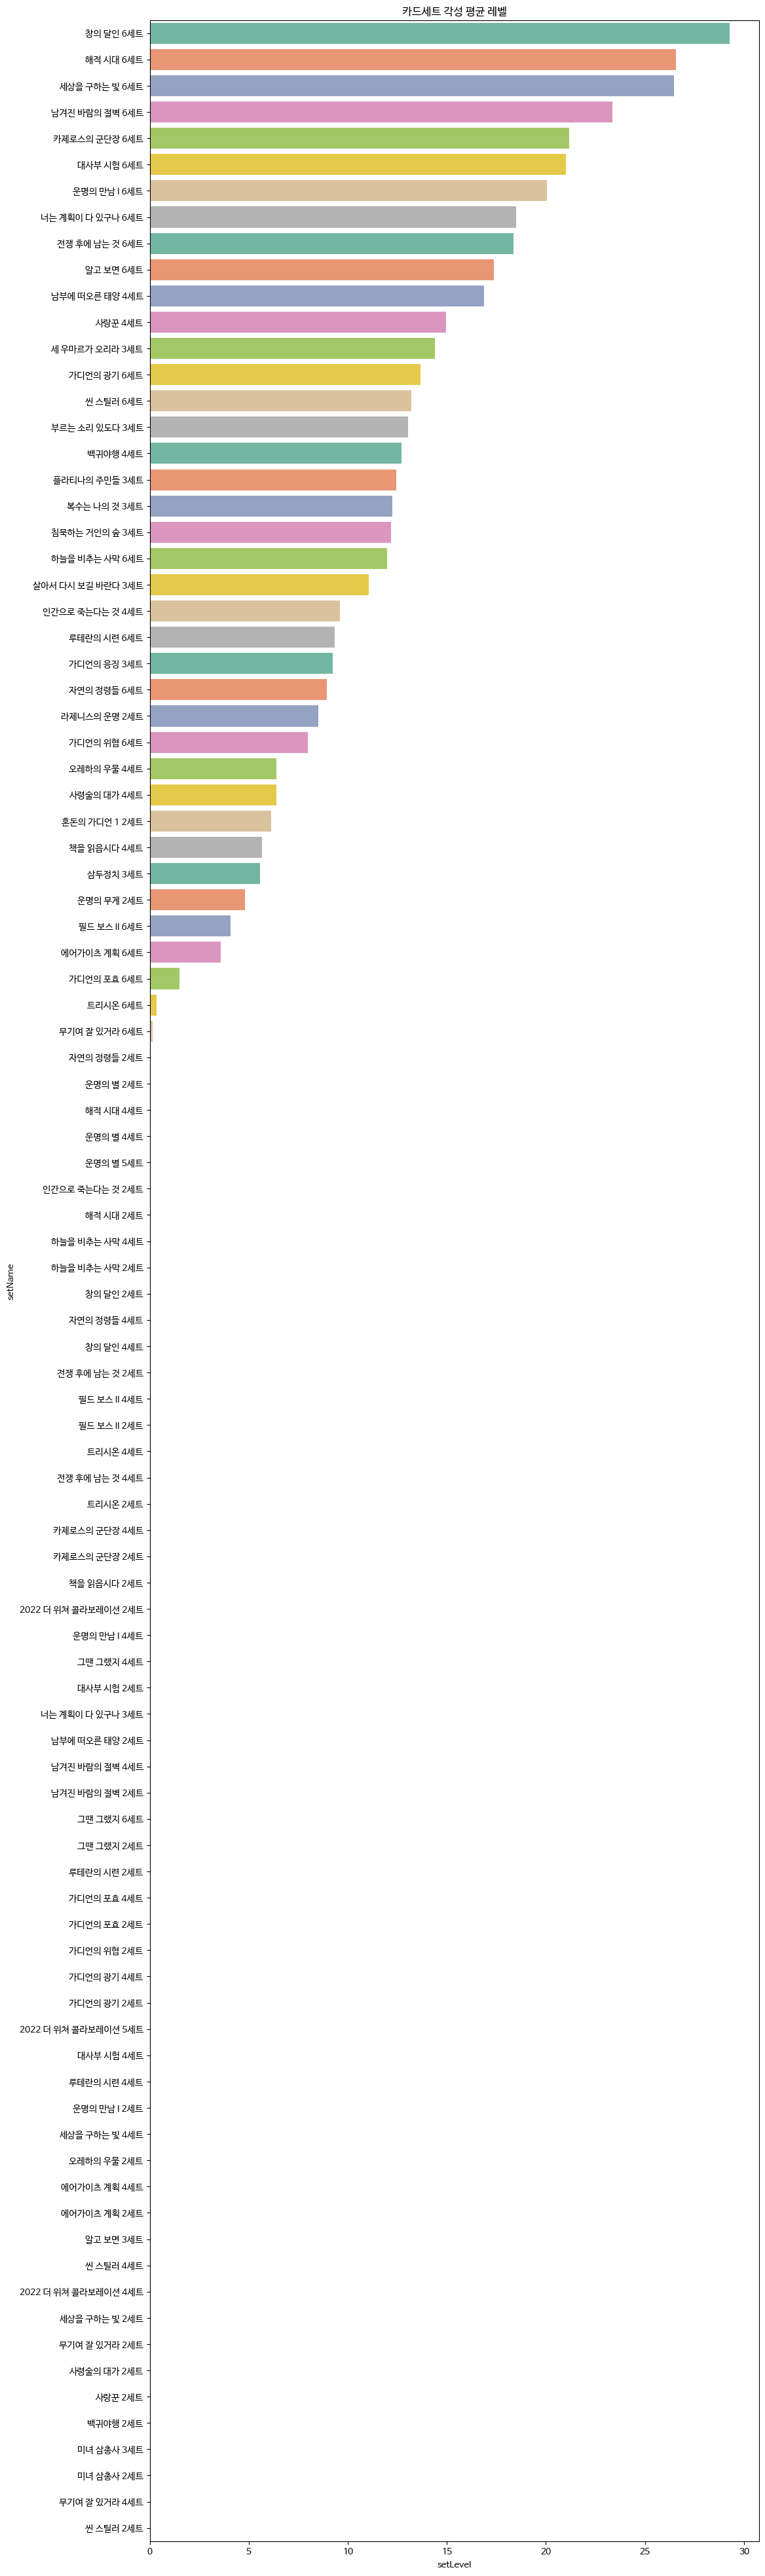

In [39]:
res = pd.DataFrame()
res['setName'] = pd.concat([df[f'setName{i}'] for i in range(1, 6)])
res['setLevel'] = pd.concat([df[f'setPoint{i}'] for i in range(1, 6)])

data = res.groupby('setName').mean().sort_values(by='setLevel', ascending=False)

plt.figure(figsize=(12, 50))
sns.barplot(x=data['setLevel'], y=data.index, palette='Set2', orient='h')
plt.title('카드세트 각성 평균 레벨')
plt.show()

In [71]:
res = pd.DataFrame()
res['setName'] = pd.concat([df[f'setName{i}'] for i in range(1, 6)])
res['setLevel'] = pd.concat([df[f'setPoint{i}'] for i in range(1, 6)])
res.dropna(inplace=True)
res[res['setLevel']>=15].groupby('setName').size()

setName
가디언의 광기 6세트              15
가디언의 응징 3세트              22
남겨진 바람의 절벽 6세트        27998
남부에 떠오른 태양 4세트           25
너는 계획이 다 있구나 6세트      11310
대사부 시험 6세트                3
루테란의 시련 6세트               4
무기여 잘 있거라 6세트            13
백귀야행 4세트                 10
복수는 나의 것 3세트             34
부르는 소리 있도다 3세트           13
사랑꾼 4세트                9528
사령술의 대가 4세트               4
살아서 다시 보길 바란다 3세트      4247
삼두정치 3세트                 45
세 우마르가 오리라 3세트         4064
세상을 구하는 빛 6세트        302256
씬 스틸러 6세트                 2
알고 보면 6세트              1948
에어가이츠 계획 6세트              1
오레하의 우물 4세트              30
운명의 만남 I 6세트            727
인간으로 죽는다는 것 4세트          50
자연의 정령들 6세트               1
전쟁 후에 남는 것 6세트           11
창의 달인 6세트              3505
책을 읽읍시다 4세트               8
침묵하는 거인의 숲 3세트         6008
카제로스의 군단장 6세트         16700
트리시온 6세트                 11
플라티나의 주민들 3세트            10
필드 보스 II 6세트           2539
하늘을 비추는 사막 6세트            2
해적 시대 6세트               359
dtype: int64

약 70%는 유효 카드셋을 착용 중(18각 이상, 30각은 52.8%)

In [72]:
cardSet18 = {
    "남바절":27998,
    "세구빛":302256,
    "세우마르":4064,
    "라제":5872,
    "창달":3505
}
cardSet30 = {
    "남바절":27998,
    "세구빛":215485,
    "세우마르":4064,
    "라제":5872,
    "창달":3374
}
sum18 = 0
for v in cardSet18.values():
    sum18 += v
sum30 = 0
for v in cardSet30.values():
    sum30 += v

print("18각 이상: ", sum18 / len(res) * 100)
print("30각 이상: ", sum30 / len(res) * 100)

18각 이상:  70.76441920652928
30각 이상:  52.871899507709664
